In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


Let's read in the image again.

In [2]:
uppsalapic=plt.imread('uppsala.ppm')

In [3]:
uppsalapic.shape

(1536, 2312, 3)

In [4]:
# in order to modify the image array, we need to make it _writeable_
# we can see that the flag 'WRITEABLE' is set to False
uppsalapic.flags


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [5]:
# update the flags
uppsalapic.setflags(write=True)
uppsalapic.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

<IPython.core.display.Javascript object>


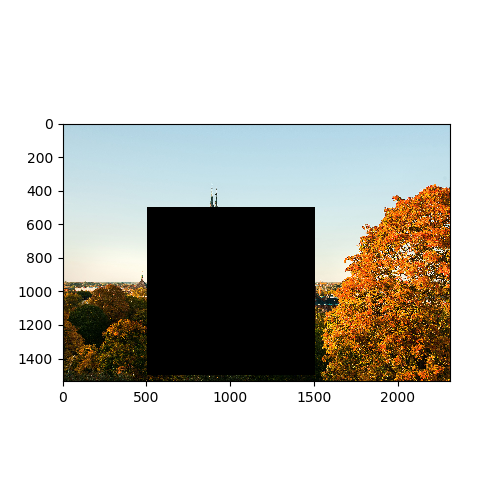

In [6]:
#change some portion to black
# i.e. set the RGB intensities to zero in some rectangular region.
picwithsquare = uppsalapic.copy()
picwithsquare[500:1500,500:1500] = 0
plt.figure(figsize(5,5))
plt.imshow(picwithsquare)

We can also see the different colour channels separately. To see e.g. the red separately, we set the blue and the green intensities to zero.

<IPython.core.display.Javascript object>


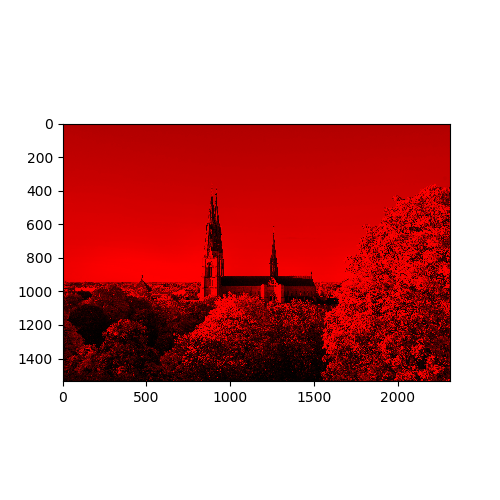

In [7]:
# we can also extract the different channels (R G B)
redpic=uppsalapic.copy()
redpic[:,:,1:] = 0
plt.figure(figsize=(5,5))
plt.imshow(redpic)

To see the blue channel, we set the red and the green to zero.

<IPython.core.display.Javascript object>


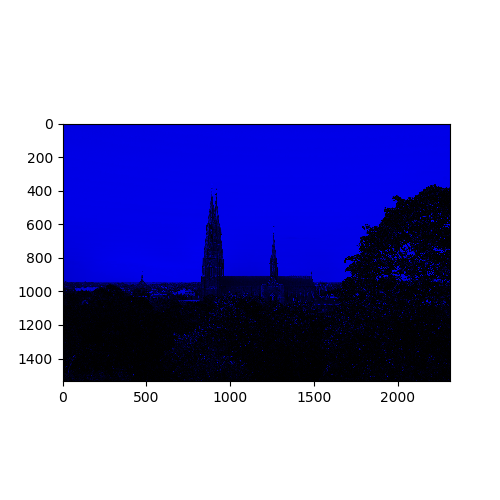

In [8]:
# we can also extract the different channels (R G B)
bluepic=uppsalapic.copy()
bluepic[:,:,:2] = 0
plt.figure(figsize=(5,5))
plt.imshow(bluepic)

# Generating images

We can generate images completely from scratch as well.

As an example, let's create a red circle on a black background.

In [9]:
import random

<IPython.core.display.Javascript object>


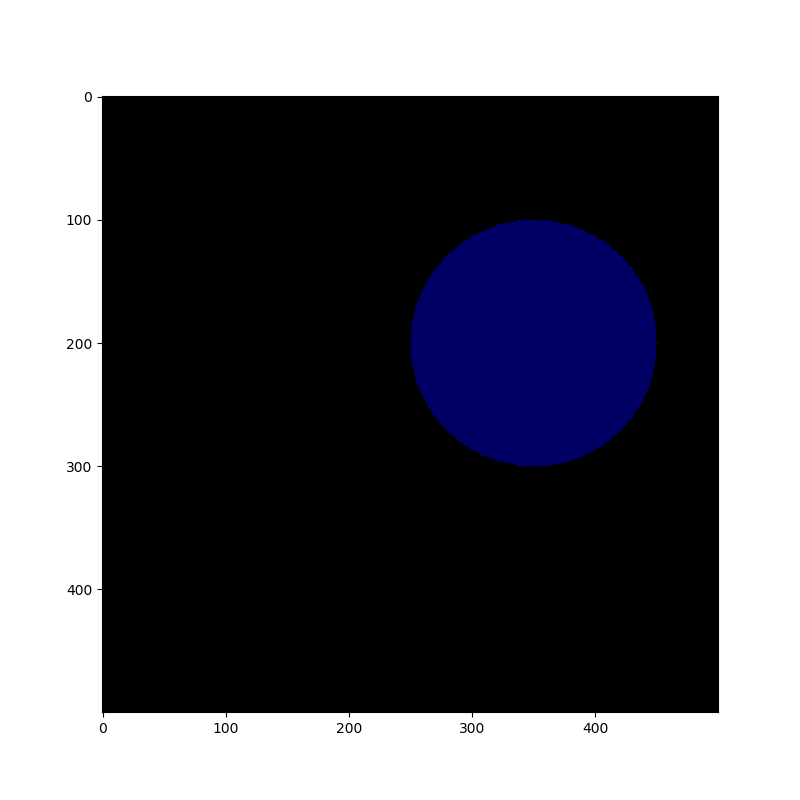

In [10]:
# create a black picture to start with
circpic = np.zeros((500,500,3),dtype=np.uint8) # a 500 by 500 pixel image (with the 3 colour channels)
for i in range(circpic.shape[0]):
    for j in range(circpic.shape[1]):
        # if we are at distance at most 100 from the point (200,350), make the pixel blue
        if (i-200)**2 + (j-350)**2 <= 100**2:
            circpic[i,j,2] = 100
            
plt.figure(figsize=(8,8))
plt.imshow(circpic)

We can now add more than one circle, by defining the function `addcircle` that takes an x-coordinate and a y-coordinate for the centre of the circle as well as a value for the radius as parameters.

Then we call that function repeatedly with random values for the coordinates and the radius.

<IPython.core.display.Javascript object>


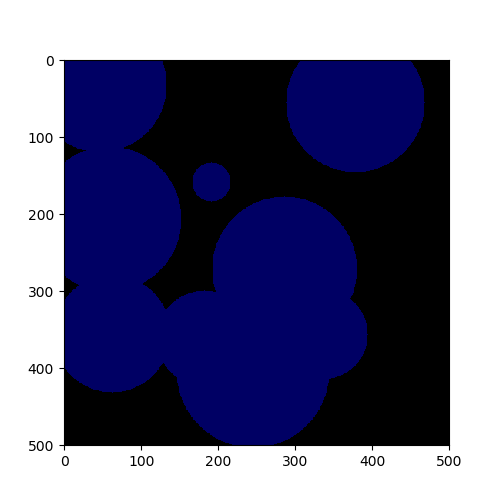

In [11]:
circpic2 = np.zeros((500,500,3), dtype=np.uint8)

def addcircle(arr, x, y, radius):
    for r in range(500):
        for c in range(500):
            if (r-x)**2 + (c-y)**2 <= radius**2:
                arr[r,c,2] = 100

for i in range(10):
    addcircle(circpic2, random.choice(range(500)),random.choice(range(500)), random.choice(range(100)))
                
plt.figure(figsize=(5,5))
plt.imshow(circpic2)
